In [ ]:
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget 'https://cdn.pixabay.com/photo/2023/09/02/15/03/lynx-8229077_1280.png'

--2023-11-25 16:10:48--  https://cdn.pixabay.com/photo/2023/09/02/15/03/lynx-8229077_1280.png
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::6812:2860, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 296035 (289K) [image/png]
Saving to: ‘lynx-8229077_1280.png’

lynx-8229077_1280.p 100%[===================>] 289.10K  --.-KB/s    in 0.005s  

2023-11-25 16:10:48 (62.0 MB/s) - ‘lynx-8229077_1280.png’ saved [296035/296035]



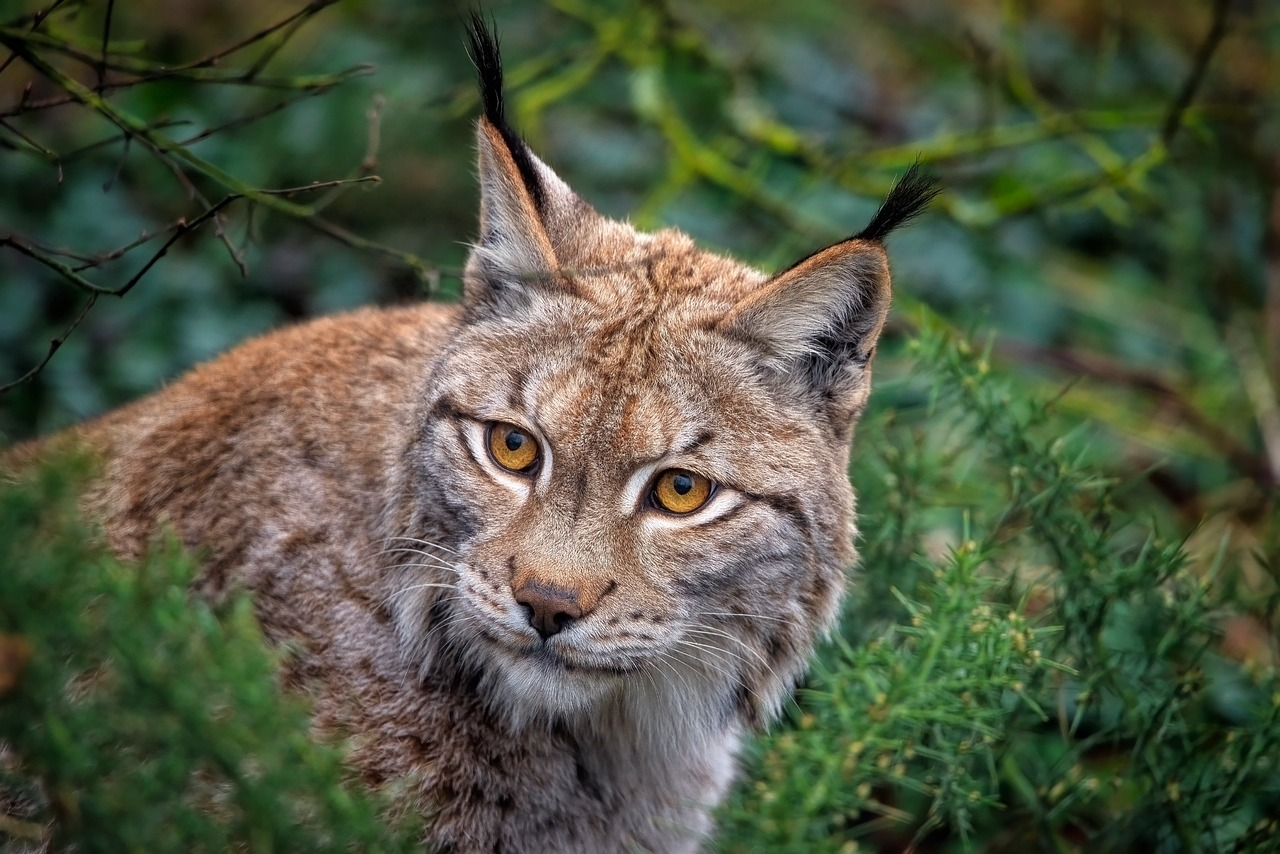

In [ ]:
image = Image.open('lynx-8229077_1280.png')
image

# RGB

Мы загрузили из интернета картинку `854x1280` и прочитали ее с помощью библиотеки `PIL`. Любое изображение, с точки зрения данных, представляет собой числовой массив, который может быть представлен в виде числовой таблицы или матрицы, где каждый элемент кодирует тот или иной пиксель. Но есть, как говорится, нюанс! В случае, когда наша картинка цветная, чаще всего она может быть представлена в виде трех матриц, или трехмерной матрицы, каждая из которых кодирует один из трех каналов:

* R - красный
* G - зеленый
* B - синий

Если мы говорим о 8-ми битной кодировки, то в каждом канале каждый пиксель может принимать целые значение от 0 до 255. Это значение показывает интенсивность (яркость) цвета для одного из каналов RGB или яркость белого для ЧБ изображения (одноканального). Как известно, чтобы закодировать число 256 в двоичном виде - нулями и единицами, нужно 8 знаков. Поэтому мы говорим о 8-мибитном изображении.

Ниже дан калькулятор RGB. Поиграйтесь им!

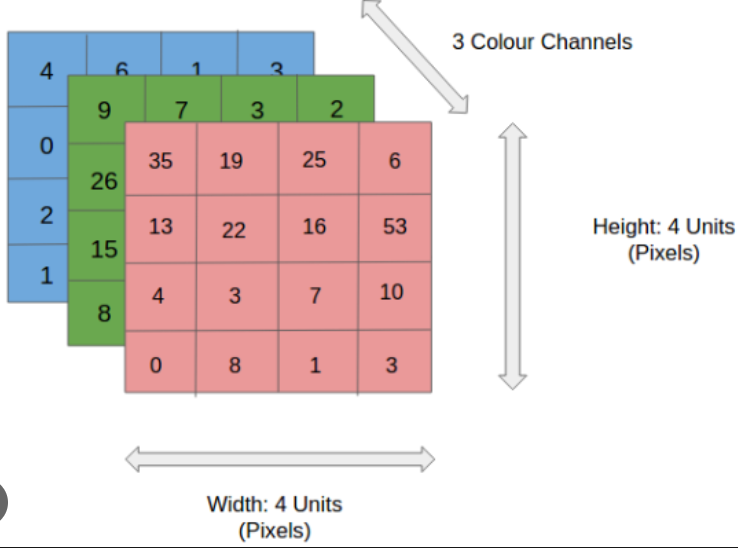

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
slider_r = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Красный:'
)
slider_g = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Зеленый:'
)
slider_b = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Синий:'
)

def update_rgb_image(r_value, g_value, b_value):
    width, height = 200, 200
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    r = int(r_value)
    g = int(g_value)
    b = int(b_value)

    rgb_image[:, :, 0] = r
    rgb_image[:, :, 1] = g
    rgb_image[:, :, 2] = b

    image = Image.fromarray(rgb_image)

    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.title(f'RGB изображение')
    plt.axis('off')
    plt.show()


out = widgets.Output()


def on_slider_change(change):
    r_value = slider_r.value
    g_value = slider_g.value
    b_value = slider_b.value

    with out:
        clear_output(wait=True)
        update_rgb_image(r_value, g_value, b_value)

slider_r.observe(on_slider_change, 'value')
slider_g.observe(on_slider_change, 'value')
slider_b.observe(on_slider_change, 'value')
display(widgets.VBox([slider_r, slider_g, slider_b]))
display(out)

Output()

# Image -> List

In [ ]:
rgb_matrix = np.array(image)

In [ ]:
rgb_matrix.shape

(854, 1280, 3)

In [ ]:
r_matrix = rgb_matrix[:,:,0].tolist()
g_matrix = rgb_matrix[:,:,1].tolist()
b_matrix = rgb_matrix[:,:,2].tolist()

In [ ]:
print(*r_matrix[:10], sep='\n')

[14, 15, 16, 18, 20, 21, 23, 23, 25, 25, 28, 28, 29, 29, 31, 31, 32, 33, 34, 34, 34, 34, 35, 36, 38, 39, 44, 45, 48, 49, 52, 53, 55, 55, 57, 58, 59, 60, 63, 64, 65, 66, 67, 67, 65, 65, 64, 63, 66, 65, 64, 67, 70, 71, 67, 61, 45, 28, 10, 2, 1, 3, 6, 12, 38, 41, 40, 34, 25, 21, 20, 18, 16, 17, 17, 16, 16, 17, 17, 15, 14, 12, 14, 16, 19, 21, 26, 29, 34, 37, 38, 36, 35, 36, 36, 35, 38, 38, 39, 39, 40, 40, 40, 40, 39, 39, 38, 35, 28, 15, 4, 2, 2, 18, 32, 38, 42, 45, 45, 46, 49, 50, 50, 50, 50, 51, 51, 51, 53, 52, 54, 54, 54, 54, 55, 55, 57, 57, 56, 56, 58, 59, 60, 60, 64, 65, 66, 67, 67, 67, 68, 68, 66, 67, 67, 67, 66, 65, 64, 63, 63, 63, 64, 63, 62, 63, 66, 68, 68, 68, 68, 69, 71, 72, 72, 72, 73, 73, 71, 70, 69, 68, 68, 67, 67, 66, 66, 65, 65, 64, 62, 61, 61, 59, 59, 60, 59, 57, 55, 56, 55, 54, 53, 52, 53, 53, 53, 52, 52, 51, 51, 51, 50, 50, 50, 50, 49, 50, 51, 51, 51, 52, 53, 54, 54, 55, 56, 57, 59, 61, 63, 65, 67, 68, 70, 71, 72, 74, 75, 75, 74, 75, 75, 75, 76, 76, 76, 77, 78, 78, 81, 82

Мы создали три двумерных списка `r_matrix`, `g_matrix` и `b_matrix` размером (854, 1280) каждый для каждого канала по отдельности. Лучше не пытайтесь их посмотреть без использования `print()` так как они слишком большие для этого.

In [ ]:
def show_imade(list_: list) -> Image.Image:
  return Image.fromarray(np.array(list_, dtype = np.uint8))

Для пущей легкости работы, для вас написана функция `show_imade()`, которая вашу матрицу (двумерный list) превращает в картинку и ее показывает. Посмотрите, какое изображение будет сформировано для каждого канала.

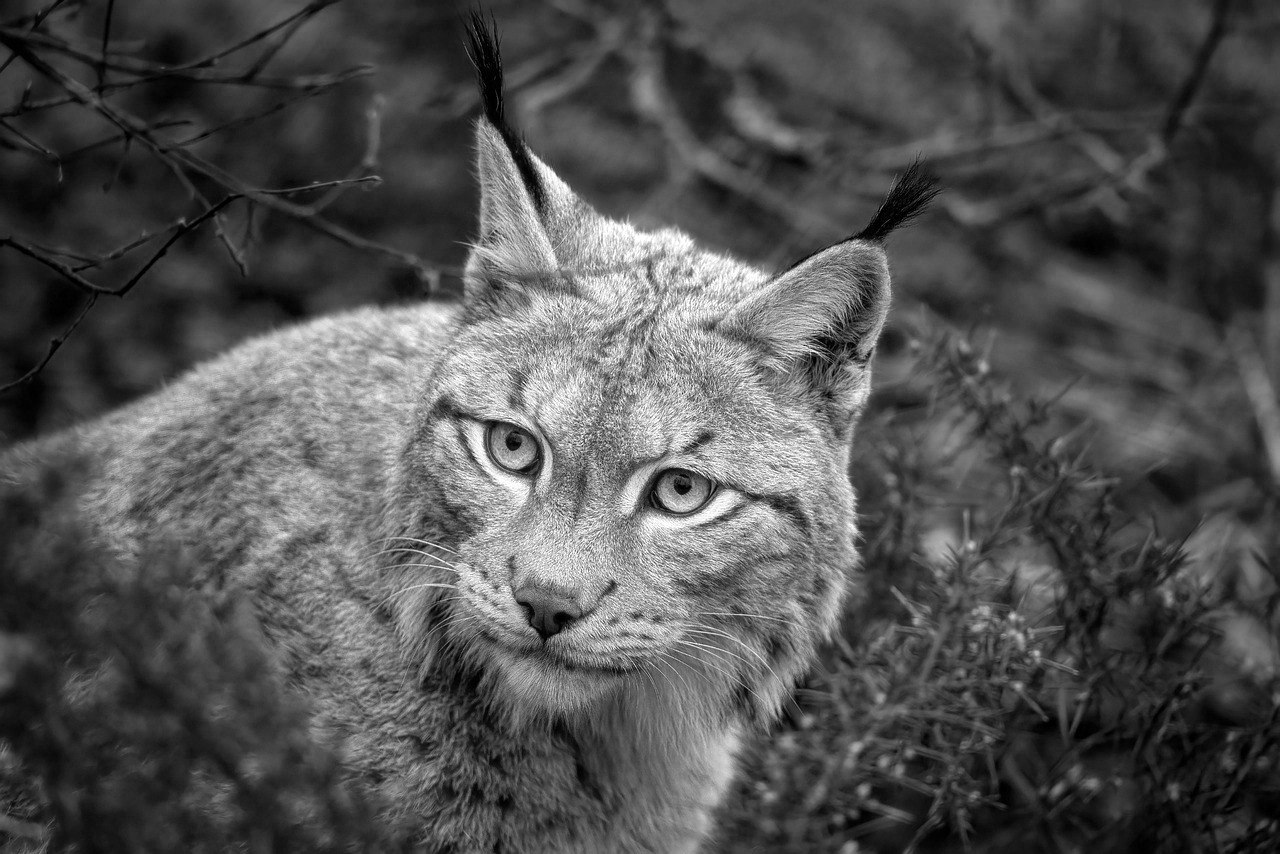

In [ ]:
show_imade(r_matrix)

# Задача.

Мы посмотрели на изображение каждого канала. Мы увидели, что один канал будет всегда интерпретироваться как черно-белое изображение, но все полученные картинки немного отличаются между собой, а поэтому считать каждое изображение самостоятельным не очень правильно.

Подумайте, как из трех матриц для каждого канала сделать одну, которая будет интерпретироваться как полноценное черно-белое изображение?

Сохраните полученный числовой массив в переменную `b_w_matrix`.

In [ ]:
# code....

# Задача

Обрежьте изображение справа, сделав его размер (854, 1029)

# Задача

Сделайте для этой картинки уменьшенную копию сжав ее в 7 раз. Для этого стоит разбить нашу матрицу на блоки размером 7*7 и для каждого блока пикселей найти среднее арифметическое. Это очевидно приведет к ухудшению качества, но в нашей задаче это не критично. Решите задачу итеративно.